<a href="https://colab.research.google.com/github/Pratheebhak/NLP-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis (IMDB Dataset)

Contents:

1. [Download Data](#download-data)
2. [Explore 50K Dataset](#explore-50k-dataset)
3. [Data Preprocessing](#data-preprocessing)
4. [Vectorization](#vectorization)
5. [Classification](#classification)
6. [Performance Analysis](#performance-analysis)



In [1]:
import pandas as pd
import re
import string

from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


## Download Data 

*  https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [4]:
data = pd.read_csv("./IMDB Dataset.csv")

## Explore 50K Dataset

In [5]:
data.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [6]:
print("Dataframe Length: {}".format(len(data)))
print("Dataframe Columns: {}".format(data.columns))

Dataframe Length: 50000
Dataframe Columns: Index(['review', 'sentiment'], dtype='object')


In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",negative
freq,5,25000


In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


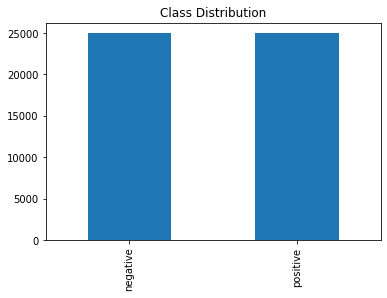

In [9]:
# Class Distribution
data['sentiment'].value_counts().plot(kind='bar', title='Class Distribution')

In [10]:
# Check for Null values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

(array([3.4883e+04, 1.0845e+04, 2.9210e+03, 1.0330e+03, 2.9300e+02,
        1.4000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([   32. ,  1399.2,  2766.4,  4133.6,  5500.8,  6868. ,  8235.2,
         9602.4, 10969.6, 12336.8, 13704. ]),
 <a list of 10 Patch objects>)

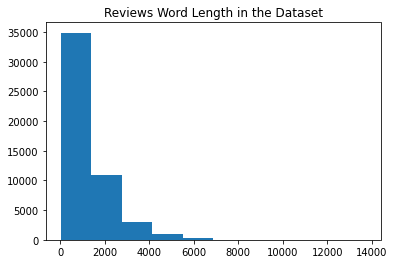

In [11]:
# Plot review length
plt.figure()
plt.title('Reviews Word Length in the Dataset')
plt.hist(list(map(len, data.review)))

## Data Preprocessing

In [12]:
# Clean the text

# Convert reviews to lowercase
data['review'] = data['review'].apply(lambda x: x.lower())
# Remove punctuations
data['review'] = data['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Remove extra spaces
data['review'] = data['review'].apply(lambda x: re.sub(' +',' ',x))
# Remove the word 'br' from reviews
data['review'] = data['review'].replace('br','')

In [13]:
# Display text samples
data['review'].sample(n=5, random_state=1)

26247    with no dead heroes you get stupid lines like that as this woefully abysmal action flick needs to be seen to be believed william sanders is saved by his buddy harry cotter during an extraction in vietnam but gets himself captured by the enemy fast forward ten years and harry is now a brainwashed russian operative with a mind control microchip implanted in his brain his new russian superior is ivan played to the obscene hilt by nick nicholson who might i add not only doesnt attempt once to speak with a russian accent but resembles more a gas station attendant in kentucky with his stained teeth what is even more absurd is the fact that he was also the dialog coach for this film soon william is rerecruited by the cia to hunt harry down he teams up with barbara a freedom fighter who has infiltrated ivans el salvador camp and soon the both of them are blowing up half of south america some scenes are so jaw droppingly awful that its a wonder why this film doesnt have more of a cult 

In [14]:
stop_words = ["br"] + list(STOPWORDS)

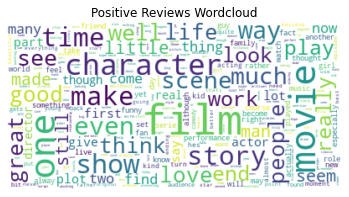

In [15]:
# Generate word cloud for positive reviews
positive_text = ' '.join(data[data.sentiment == 'positive'].review)

wordcloud_positive = WordCloud(max_font_size=50, max_words=1000, stopwords=stop_words, background_color="white").generate(positive_text)

plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews Wordcloud')
plt.show()

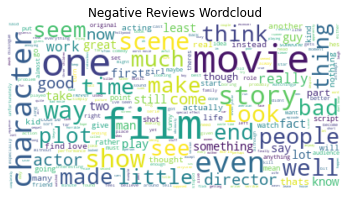

In [16]:
negative_text = ' '.join(data[data.sentiment == 'negative'].review)

wordcloud_negative = WordCloud(max_font_size=50, max_words=1000, stopwords=stop_words, background_color="white").generate(negative_text)

plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews Wordcloud')
plt.show()


* ***Tokenization***: Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.
* ***Stemming***: Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language.
* ***Lemmatization***: Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

Note:\
  The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [18]:
lemmatizer = WordNetLemmatizer()

def process_text(sentence):
    # Tokenize
    tokens = word_tokenize(sentence)
    # Remove Stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatizer
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

data['review'] = data['review'].apply(process_text)

In [19]:
data.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode youll hooked right exactly happened mebr first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awaybr say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewingthats touch darker side,positive
1,wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown lovebr id laughed one woodys comedy year dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanbr may crown jewel career wittier devil wear prada interesting superman great comedy go see friend,positive
3,basically there family little boy jake think there zombie closet parent fighting timebr movie slower soap opera suddenly jake decides become rambo kill zombiebr ok first youre going make film must decide thriller drama drama movie watchable parent divorcing arguing real life jake closet totally ruin film expected see boogeyman similar movie instead watched drama meaningless thriller spotsbr 3 10 well playing parent descent dialog shot jake ignore,negative
4,petter matteis love time money visually stunning film watch mr mattei offer u vivid portrait human relation movie seems telling u money power success people different situation encounter variation arthur schnitzlers play theme director transfer action present time new york different character meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitatbr thing one get soul picture different stage loneliness one inhabits big city exactly best place human relation find sincere fulfillment one discerns case people encounterbr acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make character come alivebr wish mr mattei good luck await anxiously next work,positive


## Vectorization


In [20]:
reviews = data.review.values
labels = data.sentiment == 'positive'

In [21]:
# Count Vectorizer
cv_vectorizer = CountVectorizer()
cv_vectorizer.fit(reviews)
X_cv = cv_vectorizer.transform(reviews)

In [22]:
# TFIDF Vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(reviews)
X_tfidf = tfidf.transform(reviews)

## Build Classifier - Logistic Regression 

In [23]:
# Train Test Split - Count Vectorizer
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, labels, train_size=0.75)
# Train Test Split - TFIDF Vectorizer
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, labels, train_size=0.75)

In [24]:
lr_model = LogisticRegression(solver='lbfgs', max_iter = 1000)

Logistic Regression Evaluation - Count Vectorizer
Training Accuracy:0.9973
Test Accuracy:0.8898


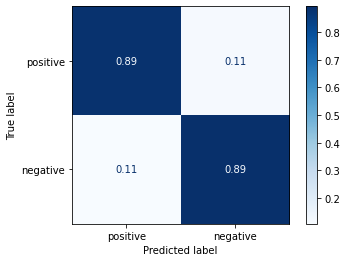

In [25]:
# Logistic Regression on Count Vectorizer
lr_model.fit(X_train_cv, y_train_cv)
lr_pred_cv = lr_model.predict(X_test_cv)

print("Logistic Regression Evaluation - Count Vectorizer")
print("Training Accuracy:{:.4f}".format(lr_model.score(X_train_cv, y_train_cv)))
print("Test Accuracy:{:.4f}".format(lr_model.score(X_test_cv, y_test_cv)))

class_names = ['positive','negative']
disp = plot_confusion_matrix(lr_model, X_test_cv, y_test_cv,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.show()

Logistic Regression Evaluation - TFIDF Vectorizer
Training Accuracy:0.9349
Test Accuracy:0.8899


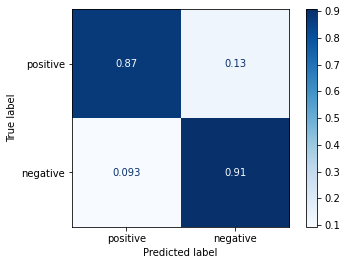

In [26]:
# Logistic Regression on TFIDF Vectorizer
lr_model.fit(X_train_tfidf, y_train_tfidf)
lr_pred_tfidf = lr_model.predict(X_test_tfidf)

print("Logistic Regression Evaluation - TFIDF Vectorizer")
print("Training Accuracy:{:.4f}".format(lr_model.score(X_train_tfidf, y_train_tfidf)))
print("Test Accuracy:{:.4f}".format(lr_model.score(X_test_tfidf, y_test_tfidf)))

class_names = ['positive','negative']
disp = plot_confusion_matrix(lr_model, X_test_tfidf, y_test_tfidf,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

plt.show()

## Performance Analysis

In [27]:
# TFIDF Vectorizer 
# Get Feature Coefficients
feature_coeffs_ = {word:coeff for word, coeff in zip(tfidf.get_feature_names(), lr_model.coef_[0])}
print('TFIDF Vectorizer')
# Most Representative Words for Positive Reviews
print('Most Representative Words for Positive Reviews')
for positive in sorted(feature_coeffs_.items(), key=lambda x:x[1], reverse=True)[:5]:
  print(positive)
# Most Representative Words for Negative Reviews
print('Most Representative Words for Negative Reviews')
for negative in sorted(feature_coeffs_.items(), key=lambda x:x[1])[:5]:
  print(negative)

TFIDF Vectorizer
Most Representative Words for Positive Reviews
('great', 8.28757670249258)
('excellent', 7.093874547180428)
('best', 6.041909103588054)
('perfect', 5.295509440214256)
('favorite', 5.237518211520034)
Most Representative Words for Negative Reviews
('worst', -11.195597293331849)
('bad', -8.83505358080947)
('waste', -8.141805772718566)
('awful', -8.003479398792674)
('boring', -6.665759609571356)
